# Titanic Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

cur_dir = os.path.dirname('__file__')

train = pd.read_csv(os.path.join(cur_dir, "train.csv"))
test = pd.read_csv(os.path.join(cur_dir, "test.csv"))

# Class

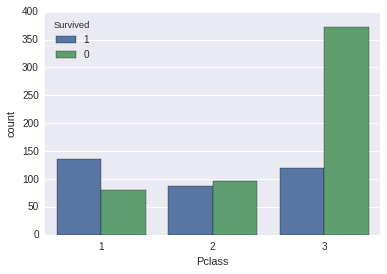

In [2]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train.sort_values("Pclass"))

## Sex

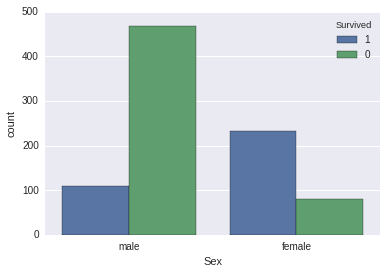

In [3]:
ax = sns.countplot(x="Sex", hue="Survived", data=train.sort_values("Pclass"))

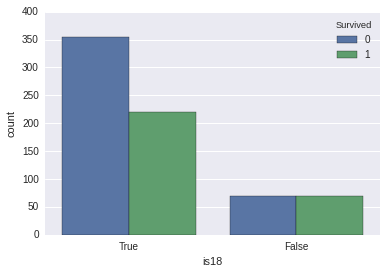

In [21]:
def is18(n):
    if pd.isnull(n):
        return n
    return n > 18

is18 = train.Age.apply(is18)
is18.name='is18'
train['is18'] = is18

ax = sns.countplot(x=is18, hue="Survived", data=train)

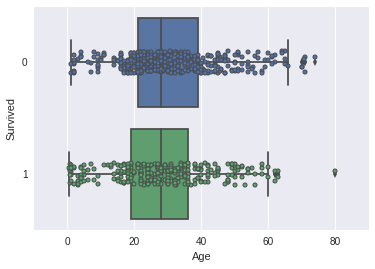

In [9]:
ax = sns.boxplot(data=train, x="Age", y="Survived", orient="h")
ax = sns.stripplot(x="Age", y="Survived", data=train, size=4, jitter=True, edgecolor="gray", orient="h")

## By Age and Gender

In [29]:
train.groupby(['Sex', 'is18'])['Survived'].mean()

Sex     is18 
female  False    0.676471
        True     0.782383
male    False    0.338028
        True     0.180628
Name: Survived, dtype: float64

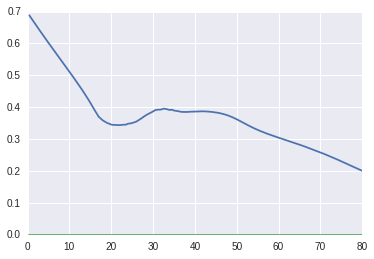

In [58]:
from statsmodels.nonparametric.smoothers_lowess import lowess

male = train[train.Sex == 'male']

sns.regplot(data=train, x='Age', y='Survived', lowess=True) # this makes a pretty line
sns.regplot(data=male, x='Age', y='Survived', lowess=True) # this makes a flat line at 0.

# I also tried manually doing the regression, which is what seaborn does anyway.

l1 = lowess(train.Survived, train.Age)
plt.plot(l1[:, 0], l1[:, 1]) # pretty line!

l2 = lowess(male.Survived, male.Age)
plt.plot(l2[:, 0], l2[:, 1]) # flat line. :(